<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Generating random data that will be close to linear when plotted
x_axis = np.arange(0.0, 26.0, 1.0)
y_axis = 2.0 * x_axis + 5 + np.random.normal(0.0, 2.5, x_axis.size)

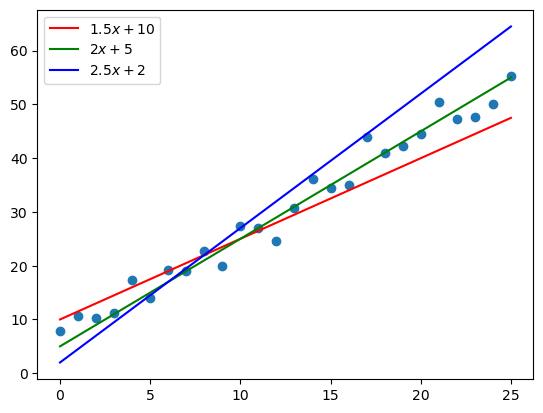

In [55]:
plt.plot(x_axis, y_axis, "o")

# Overlay some lines on the plot.
x = np.arange(0.0, 26.0, 1.0)
plt.plot(x, 1.5 * x + 10, 'r-', label=r"$1.5x + 10$")
plt.plot(x, 2 * x +  5.0, 'g-', label=r"$2x +  5$")
plt.plot(x, 2.5 * x + 2, 'b-', label=r"$2.5x + 2$")

# Add a legend.
plt.legend()

In [56]:
# Calculate the absolute value cost of the lines above for the data above.
# Code adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
cost = lambda m,c: np.sum([abs(y_axis[i] - m * (x_axis[i]) - c) for i in range(x_axis.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (1.5, 10.0, cost(1.5, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (2.0,  5.0, cost(2.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (2.5, 2.0, cost(2.5, 2.0)))

Cost with m =  1.50 and c = 10.00:    83.94
Cost with m =  2.00 and c =  5.00:    51.22
Cost with m =  2.50 and c =  2.00:   126.06


This calculation gives us a quantitative value as to the line that best fits the data. The value is a sum of the distance between each point and the line. The lower the value is indicates that the points are closer to the line overall.

The absolute function is generally not preferred, however. One reason is that there are difficulties in performing calculus with absolute values [1]. With absolute values, we would need to continually draw lines and calculate which one is the best fit. Even then, we would not be sure if the best line we have is indeed the best fit, or whether another better line exists. Instead, using least squares instead goes some way to alleviating these issues. Absolute deviation calculations have an advantage over least squares when it comes to robustness, however, as least squares can be affected by outliers or extreme values[2].

<img src="https://i.stack.imgur.com/PKqDq.png" width="600"/>
[3]

References

1. https://www.bradthiessen.com/html5/docs/ols.pdf
2. https://en.wikipedia.org/wiki/Least_absolute_deviations
3. https://demonstrations.wolfram.com/ComparingLeastSquaresFitAndLeastAbsoluteDeviationsFit/
